In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

# Overview

This week we'll get started on modern network science. We'll focus on two key results that kick-started a revolution in our understanding of networks.

* Problems with random networks as models for real networks and the Watts-Strogatz model
* Scale-free networks and the Barabasi-Albert model

Everything is divided up into 3 big chuncks. We're now up to speed, so there's a substantial amount of material today ... but I also hope that it's fun and feels worth your time :)


# Part 1: Small world networks

Once again, we'll start with some lecturing. So it's time to watch a little video to get you started.

> **_Video Lecture_**: Some properties of real world networks. Clustering and small paths. The Watts-Strogatz model. 
> 

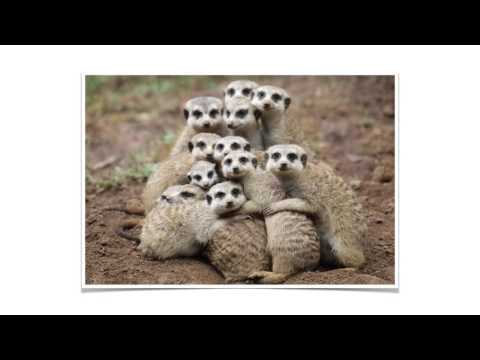

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("tMLJ2NYI1FU",width=800, height=450)

Next up is fun with reading the textbook. There's lots of goodies left in Chapter 3 that covers the stuff I've just covered in the video from a slightly different angle. 
> 
> *Reading*: For this part, we'll read the remaining part of *Network Science* Chapter 3, Section 3.5 - 3.10, with ***emphasis*** on 3.8 and 3.9\.
> 

> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
- **ANSWER** The significant deviation between the data and the Poisson fit indicates that the random network model underestimates the size and the frequency of the high degree nodes, as well as the number of low degree nodes. Instead the random network model predicts a larger number of nodes in the vicinity of ‹k› than seen in real networks

> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.   
- **ANSWER**  
    - Subcritical Regime 
    - Critical Point
    - Supercritical Regime
    - Connected Regim
  
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

- **ANSWER**: A random network has a binomial distribution, well approximated by a Poisson distribution in the k « N limit. Yet, the Poisson distribution fails to capture the degree distribution of real networks. In real systems we have more highly connected nodes than the random network model could account for.
We find that ‹C›/‹k› does not decrease as N-1, but it is largely independent of N...


<div class="alert alert-block alert-info">
For all of the reading questions I recommend not using a LLM. The questions are designed to make sure you actually read and understand the textbook. If you don't do it yourself, it won't stick in your human brain!
</div>

The next set of exercises departs from the book by presenting a little study of the Watts-Strogatz (WS) model. We're going to see just how few random links the WS model needs to dramatically shorten the path-lengths in the network. And while doing that, we'll practice using `networkx`, writing loops, and plotting nice figures.

> *Exercises*: WS edition.
> 
> 1. First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 
> 2. Describe what happens to the network when $p = 1$.
> 3. Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> 4. Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> 5. Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

<div class="alert alert-block alert-info">
Again, I hope you will try solving the coding part of this on your own - especially the part that draws on NetworkX. The whole idea is to connect concepts from the literature to real-world code. And that learning happens when you try it on your own. I also recommend you do the loops on your own. It's OK to use LLMs to style the plot. 
</div>

![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ws.png)

### **Exercises Answers below**

In [3]:
# Exercise 1 

G1 = nx.watts_strogatz_graph(n=500, k=4, p=0, seed=2025) #Nodes, degrees, rewiring probabilty, seed
G2 = nx.watts_strogatz_graph(n=500, k=4, p=0.1, seed=2025)
G3 = nx.watts_strogatz_graph(n=500, k=4, p=1, seed=2025)

G1_average_shortest_path_len = nx.average_shortest_path_length(G1)
G2_average_shortest_path_len = nx.average_shortest_path_length(G2)
G3_average_shortest_path_len = nx.average_shortest_path_length(G3)

G1_average_shortest_path_len, G2_average_shortest_path_len, G3_average_shortest_path_len

(62.875751503006015, 7.9411222444889775, 4.755607214428858)

**Exercise 2**

**ANSWER**: For $p = 1$ all links have been rewired, so the network turn into a random network.

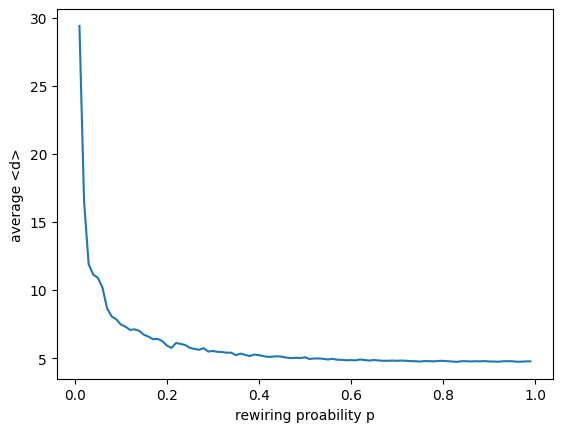

In [4]:
# Exercise 3

rewiring_prob_p = list(np.arange(0.01,1.0,0.01)) # Start, stop, interval

average_shorest_path_lenghts = []
for p in rewiring_prob_p:
    G = nx.watts_strogatz_graph(n=500, k=4, p=p)
    d = nx.average_shortest_path_length(G)
    average_shorest_path_lenghts.append(d)

plt.plot(rewiring_prob_p, average_shorest_path_lenghts)
plt.xlabel("rewiring proability p")
plt.ylabel("average <d>")
plt.show()

**ANSWER** From this plot (below) we can see around 0.6 the curve seem to flatten out. (When p = 1 all links have been rewired, so the network turn into a random network.)

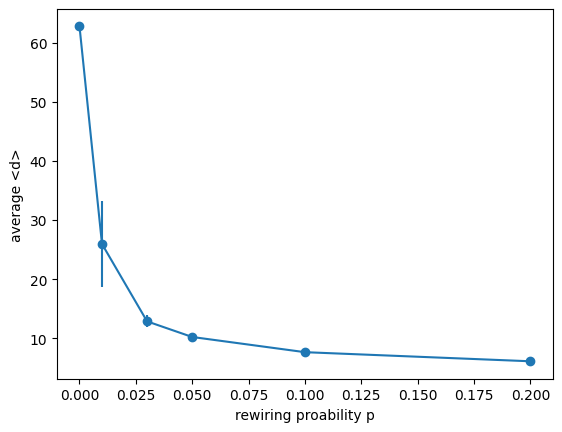

In [5]:
# Exercise 4

p_rewring_probabilities = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
loops = list(range(1,50,1))

std_d_average_shortest = []
mean_d_average_shorest = []

for p in p_rewring_probabilities:
    d_average_shortest = [] # Empty at next index in p_rewring_probabilities
    for index in loops:
        G = nx.watts_strogatz_graph(n=500, k=4, p=p)
        avg_d = nx.average_shortest_path_length(G)
        d_average_shortest.append(avg_d)

    std_d_average_shortest.append(np.std(d_average_shortest))
    mean_d_average_shorest.append(np.mean(d_average_shortest))

plt.errorbar(p_rewring_probabilities, mean_d_average_shorest, yerr=std_d_average_shortest, fmt='o-') # Errorbar
plt.xlabel("rewiring proability p")
plt.ylabel("average <d>")
plt.show()

**Exercise 5**

**ANSWER**: On the above plot, we see the relationship between the average path lenght, $\langle d \rangle$, and the rewiring parameter $p$ which is the probability $p$ each link is rewired to a randomly chosen node. When $p$ get higher, the average path lenght, goes down. (If $p=1$ we all links have been rewired, so the network turn into a random network.)
When $p$ is low, the average path lenght is large. (See image, below from the Lecture Book)

<img src='images/2025-09-17-14-17-13.png' width='500' />
<img src='images/2025-09-17-14-17-30.png' width='600' />

## Part 2: Scale-free networks

The text book uses two whole chapters on the scale free property. We'll try and power through during the remainder of this lecture. As always, let's start by getting my take on the whole thing.

> **_Video Lecture_**: The scale free property and the Barabasi-Albert Model. 
> 

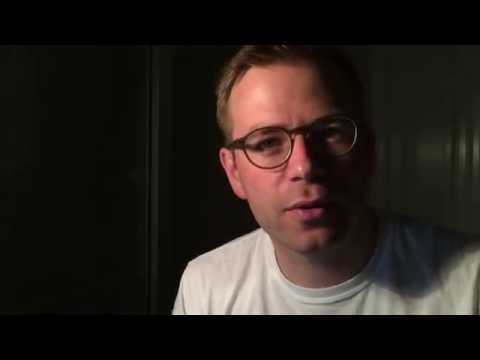

In [6]:
YouTubeVideo("myLgzbXxhOQ",width=800, height=450)

And now it's time for you guys to read. Recall that Barabasi (who wrote the textbook) discovered power-laws.

> *Reading*: Now we dig into the extended history and and theory behind Scale-Free networks and the Barabasi-Albert Model.
> 
> * Chapter 4, Section 4.1 - 4.7\.
> * Chapter 5, section 5.1 - 5.5\.
> 

> *Exercises*: BA edition.
> 
> First a couple of questions to make sure that you've actually read the text.
> 
> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

**ANSWER**: 
- **Anomalous Regime** ($\gamma \leq 2$): If $\gamma < 2$ the **exponent** $\frac{1}{\gamma - 1}$ of the equation $k_{max} = k_{min} N \frac{1}{\gamma - 1}$ is larger than 1, hence the numbers of links connected to the largest hub grows faster than the size of the network. Large scale-free with $\gamma < 2$, that lack multi-links, cannot exist. Both $\langle k \rangle$ and $\langle k^2 \rangle$ diverges.
  
- **Scale-Free Regime** ($2 < \gamma < 3$): In this regime the first moment of the degree distribution is finite but the second and higher moments diverge as $N \rightarrow \infty$. Consequently scalefree networks in this regime are ultra-small. $\langle k \rangle = \text{finite}$ and $\langle k^2 \rangle = \text{diverges}$. 
  
- **Random Network Regime** ($\gamma > 3$): Both Both $\langle k \rangle$ and $\langle k^2 \rangle$ are finite. For all practical purposes the properties of a scale-free network in this regime are difficult to distinguish from the properties a random network of similar size. Their limited size, it is difficult to obtain convincing evidence of their scale-free nature

<img src='images/2025-09-18-18-28-02.png' width='500' />

> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

**ANSWER**:
- **No Preferential Attachment** ($\alpha = 0$): The network has a simple exponential degree distribution (following equation 5.18 in book). Hubs are absent and the resulting network is similar to a random network.
  
- **Sublinear Regime** ($0 < \alpha < 0$): The degree distribution follows the stretched exponential (5.23), resulting in fewer and smaller hubs than in a scale-free network. As $\alpha \rightarrow 1$ the cutoff length increases and $p_k$ follows a power law over an increasing range of degrees.
  
- **Linear Regime** ($\alpha = 1$): This corresponds to the Barabási-Albert model, hence the degree distribution follows a power law.
- **Superlinear Regime** ($\alpha > 1$): The high-degree nodes are disproportionately attractive. A winner-takes-all dynamics leads to a hub-and-spoke topology. In this configuration the earliest nodes become super hubs and all subsequent nodes link to them. The degree distribution, shown for $\alpha = 1.5$ indicates the coexistence of many small nodes with a few *super hubs* in the vicinity of $k=10^4


> We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success:
> 
> 1. First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).
> 2. Now add another node, connecting one of the existing nodes in proportion to their degree.
> 3. Keep going until you have a 100 node network.
>   * *Hint*: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using `random.choice`) corresponds to selecting a node with probability proportional to it's degree.
> 4. Plot the network. 
> 5. Add more nodes until you have a 5000 node network.
> 6. What's the maximum and minimum degree?
> 7. Now, bin the degree distribution using `numpy.histogram`.
> 8. Plot the distribution. Plot it with both linear and log-log axes.
> 
> ![Sune's version](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/ba.png)

<div class="alert alert-block alert-info">
As above, I recommend you try this on your own. It's so cool to experience that you can actually code up a BA network on your own ... and that it's not that difficult. See if you can figure out how to do the plotting and get the bins right (*remember last week's exercise*), and as always, it's OK to ask your LLM for help with the styling. 
</div>

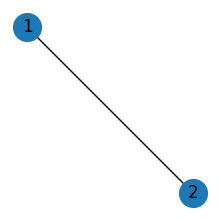

In [7]:
# Exercise 1
# Creating a graph with a single link

nodes = [1,2]
links = [(1,2)]
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(links)

pos = nx.spring_layout(G, seed=0)
plt.figure(figsize=(2,2))
nx.draw(G, pos, with_labels=True, node_size=400)
plt.show()

[1, 2]
[1, 2, 3]


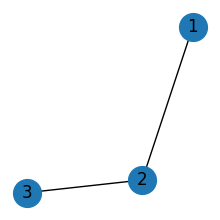

In [8]:
# Exercise 2
# adding one more node to the graph

print(G.nodes)
G.add_node(len(G.nodes) + 1)
print(G.nodes)
# Taken the lastest added now [-1]. Does not matter if we pick node 1 or 2 here, both have the same degree
G.add_edge(list(G.nodes)[-1], random.choice(nodes))

pos = nx.spring_layout(G, seed=0)
plt.figure(figsize=(2,2))
nx.draw(G, pos, with_labels=True, node_size=400)
plt.show()

In [9]:
# Exercise 3
# Doing until you have 100 node network

while len(G.nodes) < 100:
    new_node = len(G.nodes) + 1

    edge_list = []
    for first_end_point_edge, second_end_point_edge in G.edges():
        edge_list.append(first_end_point_edge)
        edge_list.append(second_end_point_edge)
    
    ## Gives "preferential attachment" mechanism
    preferential_attachment = random.choice(edge_list)
    G.add_edge(new_node, preferential_attachment)

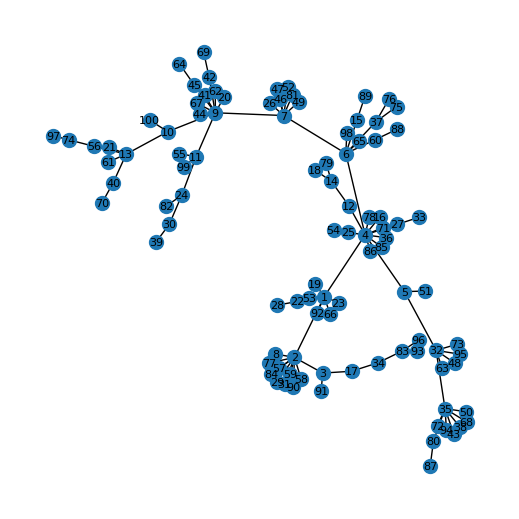

In [10]:
# Exercise 4
# Plotting the network

pos = nx.spring_layout(G, seed=0)
plt.figure(figsize=(5,5))
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100)
plt.show()

In [11]:
# Exercise 5
# Adding until you have 5000 node network

print(len(G.nodes)) # Just to see if we have 100 nodes from previous Ex. 4

while len(G.nodes) < 5000:
    new_node = len(G.nodes) + 1

    edge_list = []
    for first_end_point_edge, second_end_point_edge in G.edges():
        edge_list.append(first_end_point_edge)
        edge_list.append(second_end_point_edge)
    
    ## Gives "preferential attachment" mechanism
    preferential_attachment = random.choice(edge_list)
    G.add_edge(new_node, preferential_attachment)

# Check to see if I got all 5000 nodes
print(len(G.nodes))

# Plot the network
# pos = nx.spring_layout(G, seed=0)
# plt.figure(figsize=(5,5))
# nx.draw(G, pos, with_labels=False, node_size=20)
# plt.show()

100
5000


In [12]:
# Exercise 6
# Maximum and minimum degree

degrees = [degree for _, degree in G.degree()]
print(f'maximum degree is {max(degrees)}')
print(f'minimum degree is {min(degrees)}')

# OR we can use this, to see what node(s) it is
# print(min(nx.degree(G)))
# print(max(nx.degree(G))) 

# node 1 has 101 edges, because it was first added and has higher chance to become hub
# node 5000 has 1 edge and has only 1 edge 

maximum degree is 103
minimum degree is 1


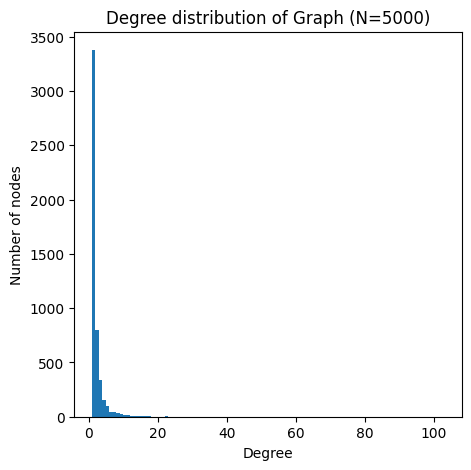

In [13]:
# Exercise 7
# bin the degree distribution using np.histogram

degrees = [d for _, d in G.degree()]
hist, bin_edges = np.histogram(degrees, bins=range(min(degrees), max(degrees)+1))

bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
plt.figure(figsize=(5,5))
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]))

plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution of Graph (N=5000)')
plt.show()

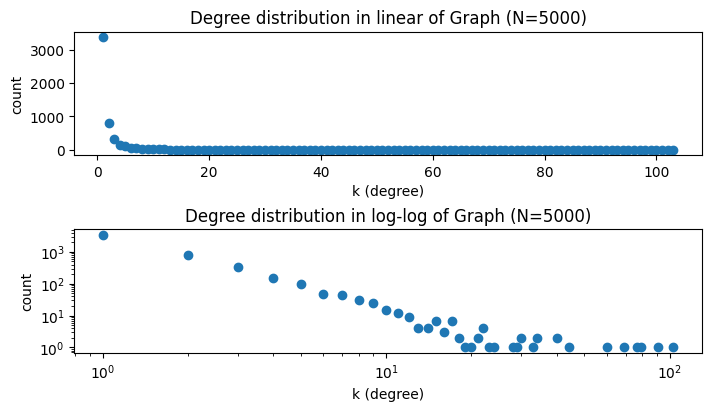

In [14]:
# Exercise 8
# Plot the distribution, both linear and log-log axes 

degrees = [d for _, d in G.degree()]
hist, bin_edges = np.histogram(degrees, bins=range(min(degrees), max(degrees)+2))
k_vals = np.arange(min(degrees), max(degrees)+1)
fig, (ax1, ax2) = plt.subplots(2,1, layout='constrained', figsize=(7, 4))

# Linear axes plot
ax1.plot(k_vals, hist, 'o')
ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlabel('k (degree)')
ax1.set_ylabel('count')
ax1.set_title('Degree distribution in linear of Graph (N=5000)')

# log-log axes plot
m = hist > 0
x_log = k_vals[m]
y_log = hist[m]
ax2.loglog(x_log, y_log, 'o')
ax2.set_xlabel('k (degree)')
ax2.set_ylabel('count')
ax2.set(title='Degree distribution in log-log of Graph (N=5000)')

plt.show()

# Part 3: The friendship paradox in scale-free networks

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network **F-BA** for *friendship BA*). Do the following:

*Exercise*. The friendship paradox in BA networks

> 1. Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).
> 2. Find $i$'s [neighbors](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html). And calculate their average degree.
> 3. Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.
> 4. Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?

In [15]:
# Exercise 1

F_BA = G.copy()
i = random.choice(list(F_BA.nodes()))
k_i = F_BA.degree(i)
print("node:", i, "degree:", k_i)

node: 1686 degree: 3


In [16]:
# Exercise 2
# Find i's nighbors

neighbors = list(F_BA.neighbors(i))
print("neighbor(s):", neighbors)

neighbor(s): [760, 1799, 3070]


In [17]:
# calculating their average degree

avg_nbr_deg = nx.average_neighbor_degree(F_BA)
avg_deg_i = avg_nbr_deg[i]
print("average neighbor(s) degree of node", i, ":", avg_deg_i)

average neighbor(s) degree of node 1686 : 2.3333333333333335


**Exercise 3**: 

- **ANSWER (NOTE NUMBERS MAY DIFFER WHEN CODE IS RUN AGAIN)** 
Yes, the friends paradox holdes in this case. The random node I picked (1881) had degree 1 and this nodes neighbor(s) which was node 473 had an average degree of 4. 
  $$4 > 1 \rightarrow \text{friends paradox holds here}$$

In [18]:
# Exercise 4 
# Now do it 1000 times and check

paradox_holds = 0
paradox_fails = 0
average_neighbors_degree = nx.average_neighbor_degree(F_BA)

for tries in range(0,1000,1):
    i = random.choice(list(F_BA.nodes()))
    k_i = F_BA.degree(i)

    if k_i < average_neighbors_degree[i]:
        paradox_holds += 1
    else:
        paradox_fails += 1

print("Paradox holds:", paradox_holds)
print("Paradox fails:", paradox_fails)

Paradox holds: 869
Paradox fails: 131


**ANSWER**: Yes it holdes in this case

*Exercise*. The friendship paradox more generally
> * What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower? 
>  - First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?
>  - Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.
>     * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See section 2 [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details (especially the $\ddagger$ footnote).
>     * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
>     * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.
> - Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

<div class="alert alert-block alert-info">
If you want to maximize your learning, think through the questions and code up the exercise above on your own. Again, it's empowering to realize that you can actually do it. I encourage you, however, to ask your LLM to explain the configuration model to you (might be more fun that reading the Wiki page).
</div>

**ANSWER Exercise 1**: 

Lower $\gamma$ flatter power law) produces a heavier tail: more high-degree hubs. When I pick a random node, its neighbors are sampled biased by degree (edges are more likely to land on hubs). So the average neighbor degree rises while my own degree doesn’t, making “your friends have more friends than you” more likely. Prediction: the paradox fraction increases as $\gamma$ decreases.

In [19]:
# Build a configuration-model graph with a flatter power law

import numpy as np
import networkx as nx
import random

# Target size and exponent (flatter than BA-ish ~3)
N = 5000
gamma = 2.2          # try 2.2 (heavier tail than 3.0). You can vary this later.
k_min = 1
k_cap = 200          # cap degrees to keep things feasible

# Sample a discrete power law via Zipf, then clip
rng = np.random.default_rng(42)
deg_seq = rng.zipf(gamma, size=N).astype(int)
deg_seq = np.clip(deg_seq, k_min, k_cap)

# Ensure even sum (required by configuration model)
if deg_seq.sum() % 2 == 1:
    deg_seq[0] += 1

# Build configuration-model multigraph, then simplify to a simple graph
CM_multi = nx.configuration_model(deg_seq, seed=42)   # allows multi-edges/self-loops
G_flat = nx.Graph(CM_multi)                           # merge parallel edges
G_flat.remove_edges_from(nx.selfloop_edges(G_flat))   # drop self-loops

# Basic stats
avg_k = sum(dict(G_flat.degree()).values())/G_flat.number_of_nodes()
print(f"Config model (γ={gamma}): N={G_flat.number_of_nodes()}, E={G_flat.number_of_edges()}, avg k≈{avg_k:.2f}")

Config model (γ=2.2): N=5000, E=6768, avg k≈2.71


In [20]:
# Measure the friendship paradox fraction on this new graph
def paradox_fraction_exact(G):
    AND = nx.average_neighbor_degree(G)  # node -> avg neighbor degree
    return sum(G.degree(n) < AND[n] for n in G) / G.number_of_nodes()

frac_flat = paradox_fraction_exact(G_flat)
print(f"Friendship paradox fraction (γ={gamma}): {frac_flat:.3f}")

Friendship paradox fraction (γ=2.2): 0.782


In [22]:
# Sweep several γ (gamma) values to demonstrate the trend

def config_graph_from_zipf(N=5000, gamma=2.2, k_min=1, k_cap=200, seed=42):
    rng = np.random.default_rng(seed)
    deg = rng.zipf(gamma, size=N).astype(int)
    deg = np.clip(deg, k_min, k_cap)
    if deg.sum() % 2 == 1:      # configuration model needs even sum
        deg[0] += 1
    M = nx.configuration_model(deg, seed=seed)  # multigraph (may have multi-edges/self-loops)
    G = nx.Graph(M)                             # merge multi-edges → simple graph
    G.remove_edges_from(nx.selfloop_edges(G))   # drop self-loops
    return G

gammas = [2.1, 2.2, 2.5, 3.0, 3.5]
results = []
for g in gammas:
    Gg = config_graph_from_zipf(N=5000, gamma=g, seed=123)
    frac = paradox_fraction_exact(Gg)   # <-- no trials/seed
    avgk = sum(dict(Gg.degree()).values())/Gg.number_of_nodes()
    results.append((g, Gg.number_of_nodes(), Gg.number_of_edges(), avgk, frac))

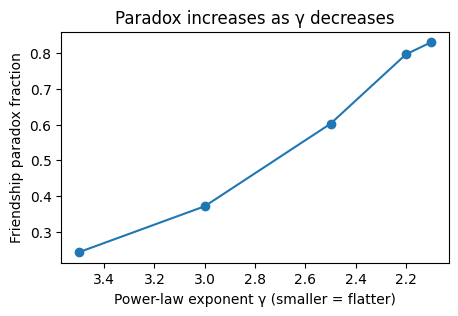

In [23]:
gammas, _, _, _, fracs = zip(*results)
plt.figure(figsize=(5,3))
plt.plot(gammas, fracs, marker="o")
plt.gca().invert_xaxis()  # smaller γ to the right emphasizes "flatter ⇒ higher"
plt.xlabel("Power-law exponent γ (smaller = flatter)")
plt.ylabel("Friendship paradox fraction")
plt.title("Paradox increases as γ decreases")
plt.show()

**ANSWER Exercise 2**:

paradox fraction increases as $\gamma$ decreases (flatter/heavier tail → more hubs → neighbors tend to have higher degree).

As predicted, the friendship paradox fraction increased when I flattened the degree distribution (smaller $\gamma$). The configuration-model networks with $\gamma$≈2.1–2.2 produced a higher fraction than $\gamma$≈3.0–3.5. This matches the intuition: more hubs bias neighbor sampling toward high-degree nodes, so on average “your friends have more friends than you” holds more often.

*Exercise*. The friendship paradox and the configuration model
> - Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
>    - What fraction of the time is the friendship paradox is true for the **F-CM** network?
>    - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
>       * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
>       * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)


<div class="alert alert-block alert-info">
This second part of the exercise is asking you to think about differences between two models for random networks. For this one, an appealing option could be to use an LLM to help quickly create the networks two and then analyze them using networkx. That way you can check your thinking.   
</div>
<div class="alert alert-block alert-info">
Don't use an LLM for the two last questions "Are there factors ..." and "How would you test ..." Use your brain, do some research and write down your own answer before consulting an LLM.
</div>

In [24]:
def paradox_fraction_exact(G):
    AND = nx.average_neighbor_degree(G)
    return sum(G.degree(n) < AND[n] for n in G) / G.number_of_nodes()

In [25]:
try:
    F_BA
    print("Using existing F_BA")
except NameError:
    # pick your n,m from earlier if you had specific values
    F_BA = nx.barabasi_albert_graph(n=5000, m=3, seed=0)
    print("Built new F_BA")

print("F_BA:", F_BA.number_of_nodes(), "nodes,", F_BA.number_of_edges(), "edges")

Using existing F_BA
F_BA: 5000 nodes, 4999 edges


I’m using the existing ```F_BA``` from earlier in the notebook: it has N = 5000 nodes and E = 4999 edges.

In [26]:
# Make F-CM with the same degree sequence
# degree-preserving randomization by edge swaps
F_CM = F_BA.copy()
nx.double_edge_swap(F_CM,
                    nswap=10*F_CM.number_of_edges(),
                    max_tries=100*F_CM.number_of_edges(),
                    seed=1)
print("F_CM (edge-swap):", F_CM.number_of_nodes(), "nodes,", F_CM.number_of_edges(), "edges")


F_CM (edge-swap): 5000 nodes, 4999 edges


```nx.double_edge_swap``` randomizes the edges while preserving the exact degree of every node. So ```F_CM``` has the same degree sequence as ```F_BA```, but all higher-order structure (triangles, communities, correlations) is randomized.

In [ ]:
# Friendship paradox fractions for F-BA vs F-CM
pf_ba = paradox_fraction_exact(F_BA)
pf_cm = paradox_fraction_exact(F_CM)
print(f"Friendship paradox fraction: F-BA: {pf_ba:.3f}   F-CM: {pf_cm:.3f}")

Friendship paradox fraction – F-BA: 0.868   F-CM: 0.646


With the same degrees, the paradox is much more frequent in the BA graph than in a degree-preserving randomized version. So structure beyond the degree distribution (how edges are arranged) makes the paradox stronger in ```F_BA```

In [28]:
# Quick property check (are they “the same” besides degree?)
def quick_props(G):
    return dict(
        N = G.number_of_nodes(),
        M = G.number_of_edges(),
        assort = nx.degree_assortativity_coefficient(G),          # degree-degree correlation
        clustering = nx.average_clustering(G)                     # triadic closure
    )

print("F-BA props:", quick_props(F_BA))
print("F-CM props:", quick_props(F_CM))

F-BA props: {'N': 5000, 'M': 4999, 'assort': -0.10263571372095434, 'clustering': 0.0}
F-CM props: {'N': 5000, 'M': 4999, 'assort': -0.020106665991625722, 'clustering': 0.0019167252467081242}


- ```F_BA``` assortativity ≈ −0.103 (more disassortative), clustering ≈ 0.000 (tree-like).
- ```F_CM``` assortativity ≈ −0.020 (closer to neutral), clustering ≈ 0.0019 (tiny but > 0).

Why it matters. More disassortativity (high-degree nodes attached to low-degree ones) increases the chance your neighbors have more friends than you. The tree-like structure also funnels many nodes into hubs via short paths, amplifying neighbor degrees.

In [29]:
def paradox_under_degree_preserving_null(G, reps=50, nswap_factor=10, seed=0):
    rng = random.Random(seed)
    vals = []
    for r in range(reps):
        H = G.copy()
        nx.double_edge_swap(H,
                            nswap=nswap_factor*H.number_of_edges(),
                            max_tries=100*H.number_of_edges(),
                            seed=rng.randint(0, 10**9))
        vals.append(paradox_fraction_exact(H))
    return np.array(vals)

vals = paradox_under_degree_preserving_null(F_BA, reps=50, nswap_factor=10, seed=123)
mean, lo, hi = vals.mean(), np.percentile(vals, 2.5), np.percentile(vals, 97.5)

print(f"Null (degree-preserving) paradox fraction: mean={mean:.3f}, 95% CI=({lo:.3f}, {hi:.3f})")
print(f"F-BA observed: {pf_ba:.3f}  |  F-CM single draw: {pf_cm:.3f}")

Null (degree-preserving) paradox fraction: mean=0.648, 95% CI=(0.636, 0.658)
F-BA observed: 0.868  |  F-CM single draw: 0.646


**What fraction for ```F_CM```?** ~0.646 in my run (within the degree-preserving null CI).

Are there factors beyond degree distribution that matter? Yes. With the same degrees, the paradox frequency can shift due to:
- Degree assortativity: Disassortative mixing (high-degree to low-degree connections) raises average neighbor degree for many nodes, boosting the paradox; assortative mixing can dampen it.
- Clustering (triangles): High clustering can create pockets of similarly high (or low) degrees, changing local neighbor averages.
- Community/modularity: Uneven mixing between dense modules can concentrate links onto a few inter-module hubs.

**How would I test rigorously?**

- Degree-preserving null: Generate many edge-swapped graphs (what I did), compute the paradox fraction for each, and report mean ± 95% CI or a permutation p-value (fraction of nulls ≥ observed).
- Multiple F-CM draws: Build many independent F_CM graphs and add error bars across draws
- Sensitivity: Repeat for different BA parameters (m) and graph sizes; optionally control for connectivity (largest component) to avoid artifacts.

*Exercise*: Growth without preferential attachment

> Finally, we'll build a network of same size and degree as in the exercise above, *using the growth mechanism without the preferential attachment*. Follow the steps below for success
> 
>  1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.
>  2. Generate an ER network of same number of nodes and links as the Sune-network. 
> * What are the differences between the ER network and the Sune-network? Explain in your own words. 
>   * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

<div class="alert alert-block alert-info">
Feel free to go nuts in asking an LLM to help you for this last exercise.
</div>

In [30]:
# Reuse existing F_BA or build one if missing
try:
    F_BA
except NameError:
    F_BA = nx.barabasi_albert_graph(n=5000, m=3, seed=0)

N = F_BA.number_of_nodes()
M = F_BA.number_of_edges()
kbar = 2*M/N

# BA theory says avg degree ≈ 2m, so m ≈ kbar/2
m_param = max(1, int(round(kbar/2)))

print(f"F_BA: N={N}, M={M}, avg degree≈{kbar:.2f}, inferred m={m_param}")

F_BA: N=5000, M=4999, avg degree≈2.00, inferred m=1


In [33]:
# build the Sune network (uniform attachment growth)
def grow_uniform_attachment(n, m, seed=0):
    """
    Grow a graph of n nodes. Start with K_m, then each new node
    attaches to m DISTINCT existing nodes chosen uniformly at random.
    """
    rng = random.Random(seed)
    # start with a complete graph on m nodes
    G = nx.complete_graph(m)
    for u in range(m, n):
        # choose m distinct targets among existing nodes [0..u-1]
        targets = rng.sample(range(u), k=m)
        for v in targets:
            G.add_edge(u, v)
    return G

F_SU = grow_uniform_attachment(N, m_param, seed=1)  # "Sune" network
print("F_SU (Sune):", F_SU.number_of_nodes(), "nodes,", F_SU.number_of_edges(), "edges")

F_SU (Sune): 5000 nodes, 4999 edges


In [34]:
# build an ER graph with the same N and M as Sune
F_ER = nx.gnm_random_graph(N, F_SU.number_of_edges(), seed=2)
print("F_ER (ER):   ", F_ER.number_of_nodes(), "nodes,", F_ER.number_of_edges(), "edges")

F_ER (ER):    5000 nodes, 4999 edges


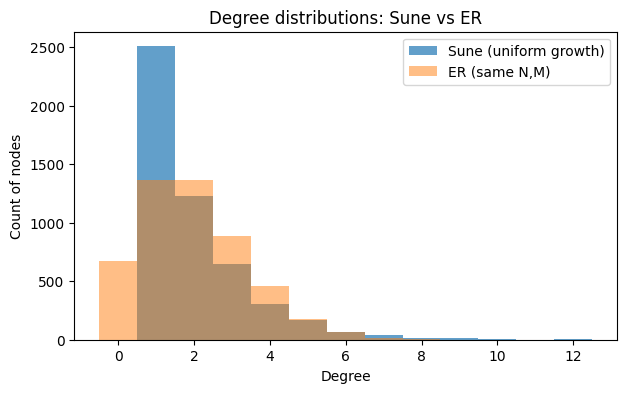

In [ ]:
# compare degree distributions (overlayed histograms)
deg_su = [d for _, d in F_SU.degree()]
deg_er = [d for _, d in F_ER.degree()]

bins = range(0, max(max(deg_su), max(deg_er))+2)

plt.figure(figsize=(7,4))
plt.hist(deg_su, bins=bins, alpha=0.7, label="Sune (uniform growth)", align="left")
plt.hist(deg_er, bins=bins, alpha=0.5, label="ER (same N,M)", align="left")
plt.xlabel("Degree"); plt.ylabel("Count of nodes")
plt.title("Degree distributions: Sune vs ER")
plt.legend(); plt.show()

Comparison (Sune vs ER). Both networks have N = 5000 and M = 4999 edges (avg degree ≈ 2), but their structures diverge. 

The Sune network is a single connected tree (components = 1, clustering = 0), with a broader degree distribution caused by growth without preferential attachment (older nodes get more chances to receive edges). 

The ER network, built with the same number of edges, shows a giant component (~80% of nodes) plus many small components, a much narrower (roughly binomial) degree distribution, tiny positive clustering (≈ p), and assortativity near 0. 

Consequently, the friendship paradox holds more often in Sune than in ER, but less often than in BA where preferential attachment creates strong hubs.

In [36]:
# connectivity & local structure

def quick_props(G):
    comps = list(nx.connected_components(G))
    return dict(
        N = G.number_of_nodes(),
        M = G.number_of_edges(),
        avg_k = 2*G.number_of_edges()/G.number_of_nodes(),
        components = len(comps),
        giant_size = len(max(comps, key=len)),
        assort = nx.degree_assortativity_coefficient(G),
        clustering = nx.average_clustering(G),
    )

print("Sune props:", quick_props(F_SU))
print("ER props:  ", quick_props(F_ER))

Sune props: {'N': 5000, 'M': 4999, 'avg_k': 1.9996, 'components': 1, 'giant_size': 5000, 'assort': -0.02234297787317401, 'clustering': 0.0}
ER props:   {'N': 5000, 'M': 4999, 'avg_k': 1.9996, 'components': 801, 'giant_size': 4012, 'assort': -0.02173111993356291, 'clustering': 0.0007428571428571429}


In [37]:
def paradox_fraction_exact(G):
    AND = nx.average_neighbor_degree(G)
    return sum(G.degree(n) < AND[n] for n in G) / G.number_of_nodes()

pf_su = paradox_fraction_exact(F_SU)
pf_er = paradox_fraction_exact(F_ER)
print(f"Friendship paradox fraction — Sune: {pf_su:.3f}   ER: {pf_er:.3f}")


Friendship paradox fraction — Sune: 0.689   ER: 0.517


How to interpret the results?
- Even without preferential attachment, the Sune (uniform-growth) network is a single tree (here $m=1$), so older nodes quietly accumulate more chances to be chosen. That yields a broader degree distribution than ER and pushes the friendship paradox higher.
- ER with the same N, M (nodes and edges) sprinkles edges at random. With average degree ≈ 2 it has a giant component plus many small components and a narrow (roughly binomial) degree distribution. Fewer hubs ⇒ lower paradox fraction.
- If you compare to your BA result (which was higher still), you get the neat ladder:

$$ER (\approx 0.52) < Sune (\approx 0.69) < BA (\approx 0.87)$$

Growth alone raises the paradox above ER; preferential growth cranks it even higher.

With N = 5000 and M = 4999 (avg degree ≈ 2), the Sune network shows a friendship-paradox fraction of 0.689, while an ER graph with the same N,M yields 0.517. 

The Sune graph is a single tree (components=1, clustering=0), and its growth process—new nodes attaching uniformly to existing ones—creates a mild right tail (older nodes get more chances), increasing the average neighbor degree. 

ER has a narrow degree distribution and many components at this density, lowering the chance that a random node’s neighbors out-degree it. 

Compared to BA (with preferential attachment), which produced an even higher fraction, we see: ER < Sune < BA, matching the intuition that more hubbiness ⇒ stronger friendship paradox